In [69]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from  datetime import datetime as dt

In [2]:
claims = pd.read_csv(r'C:\Users\k sai vinay\Desktop\analytics case study extract\python\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv')

In [3]:
cust_demographics = pd.read_csv(r'C:\Users\k sai vinay\Desktop\analytics case study extract\python\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')

In [4]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [5]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [6]:
claims.shape

(1100, 10)

In [7]:
cust_demographics.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [8]:
cust_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [9]:
cust_demographics.DateOfBirth.str.slice()

0       12-Jan-79
1       13-Jan-70
2       11-Mar-84
3       01-May-86
4       13-May-77
          ...    
1080    15-Mar-81
1081    07-Jul-96
1082    11-Apr-90
1083    22-Oct-64
1084    12-Jul-95
Name: DateOfBirth, Length: 1085, dtype: object

In [10]:
cust_demographics.DateOfBirth.str.slice(start=1,stop=-2)

0       2-Jan-
1       3-Jan-
2       1-Mar-
3       1-May-
4       3-May-
         ...  
1080    5-Mar-
1081    7-Jul-
1082    1-Apr-
1083    2-Oct-
1084    2-Jul-
Name: DateOfBirth, Length: 1085, dtype: object

In [11]:
cust_demographics['DateOfBirth']=cust_demographics.DateOfBirth.str.slice(start=0,stop=-2)+np.where(cust_demographics.DateOfBirth.str.slice(start=-2).astype(int)>23,cust_demographics.DateOfBirth.str.slice(start=-2).astype(int)+1900,
         cust_demographics.DateOfBirth.str.slice(start=-2).astype(int)+2000).astype(str)

In [12]:
cust_demographics

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-1979,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-1970,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-1984,TN,798-631-4758,Silver
3,47830476,Female,01-May-1986,MA,413-187-7945,Silver
4,19269962,Male,13-May-1977,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-1981,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-1996,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-1990,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-1964,LA,469-345-5617,Silver


# data preparation

1.combaining the two tables to get total view

In [13]:
customer_claim = pd.merge(left =cust_demographics,right = claims,how = 'inner', left_on='CUST_ID',right_on='customer_id' )
customer_claim 

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-1979,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-1970,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-1984,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-1984,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-1986,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-1981,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-1996,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-1990,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-1964,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [14]:
customer_claim .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   customer_id          1085 non-null   int64  
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

# convering the data type of clime date and dateof birth into datetime data types

In [15]:
customer_claim['DateOfBirth'].head(25)

0     12-Jan-1979
1     13-Jan-1970
2     11-Mar-1984
3     11-Mar-1984
4     01-May-1986
5     01-May-1986
6     13-May-1977
7     13-May-1977
8     17-May-1977
9     17-May-1977
10    02-Mar-1999
11    25-Oct-1999
12    12-Oct-1993
13    09-Sep-1966
14    30-Dec-1985
15    31-Oct-1999
16    16-Sep-1990
17    22-Jul-1963
18    14-Jan-1969
19    26-Jul-1977
20    15-Mar-1987
21    07-Sep-1966
22    13-Aug-1965
23    10-Oct-1979
24    22-Apr-1967
Name: DateOfBirth, dtype: object

In [16]:
customer_claim['DateOfBirth']=pd.to_datetime(customer_claim['DateOfBirth'])

In [17]:
customer_claim['claim_date']=pd.to_datetime(customer_claim['claim_date'])

In [18]:
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool | None' = None, format: 'str | None' = None, exact: 'bool' = True, unit: 'str | None' = None, infer_datetime_format: 'bool' = False, origin='unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'>

In [19]:
customer_claim.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [20]:
customer_claim.loc[(customer_claim['DateOfBirth'].dt.year>2023),'DateOfBirth']=customer_claim[customer_claim['DateOfBirth'].dt.year>2023].apply(lambda x: x-pd.DateOffset(year=100) )

In [21]:
customer_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,$2840,4.0,No


3.remove the $ symbol in claim_amount column and convert into float 64 from object

In [22]:
customer_claim ['claim_amount']=customer_claim ['claim_amount'].str.replace('$'," ").astype('float64')

C:\Users\k sai vinay\AppData\Local\Temp\ipykernel_2932\3602267986.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customer_claim ['claim_amount']=customer_claim ['claim_amount'].str.replace('$'," ").astype('float64')


In [23]:
customer_claim['claim_amount'].dtypes

dtype('float64')

4.of all the injury claims, some of them have gone unreported with the 
police. Create an alert flag (1,0) for all such claims.

In [24]:
customer_claim['falg_police']=0        # creating a column with flag_police with value 0       
   # asign the 1 when injury_only and pilice_repot is No
customer_claim.loc[(customer_claim['claim_type']=='Injury only') & (customer_claim['police_report']=='No'),'falg_police' ]=1 

In [25]:
#customer_claim.loc[customer_claim['falg_police']==1]     customers with flag_police = 1

In [26]:
customer_claim.loc[(customer_claim['claim_type']=='Injury only') & (customer_claim['police_report']=='No')]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,falg_police
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,1
21,63916778,Male,1966-09-07,IL,146-157-4572,Platinum,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,1
22,17004138,Female,1965-08-13,WA,436-354-4682,Silver,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,1
33,80379865,Male,1969-02-27,NM,427-513-8479,Gold,18210740,80379865,Natural causes,2018-02-09,Auto,No,Injury only,18580.0,NaN,No,1
41,27205554,Male,1976-04-12,RI,521-912-8139,Silver,13167216,27205554,Driver error,2018-05-14,Auto,No,Injury only,16910.0,1.0,No,1
47,54642094,Male,1995-08-10,NY,963-813-1973,Silver,3673097,54642094,Driver error,2017-04-12,Auto,No,Injury only,19960.0,1.0,No,1
48,47091036,Male,1986-10-22,SD,247-436-8713,Gold,58245818,47091036,Driver error,2018-07-27,Home,No,Injury only,27230.0,1.0,No,1
97,56590042,Male,1967-01-12,AL,254-651-9452,Silver,76552623,56590042,Other causes,2017-11-06,Auto,No,Injury only,31498.5,4.0,Yes,1
103,92752865,Male,1986-01-30,AK,143-219-5498,Silver,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,NaN,1.0,No,1
113,94448966,Female,1984-06-20,MD,845-768-2513,Gold,67043170,94448966,Other driver error,2018-10-16,Auto,No,Injury only,23760.0,1.0,No,1


5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID 
should remain unique.

In [27]:
customer_claim.shape

(1085, 17)

In [28]:
customer_claim.groupby('CUST_ID').first().reset_index(drop = True)

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,falg_police
0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,1
1,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,0
3,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0
4,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Male,1965-01-28,UT,517-562-4916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,1
1074,Female,1966-06-19,HI,457-752-1374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,0
1075,Female,1963-11-18,NC,643-246-4718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0
1076,Male,1995-06-08,OR,395-246-6172,Gold,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0


In [29]:
customer_claim = customer_claim.groupby('CUST_ID').first().reset_index(drop = True)

In [30]:
customer_claim

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,falg_police
0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,1
1,Male,1972-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,0
3,Male,1971-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0
4,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Male,1965-01-28,UT,517-562-4916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,1
1074,Female,1966-06-19,HI,457-752-1374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,0
1075,Female,1963-11-18,NC,643-246-4718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0
1076,Male,1995-06-08,OR,395-246-6172,Gold,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0


6. Check for missing values and impute the missing values with an 
appropriate value. (mean for continuous and mode for categorical)

In [31]:
customer_claim['claim_amount'].mean()       #find the mean of customer_claim[clime_amount]

12470.498519249753

In [32]:
customer_claim['claim_amount'].fillna(customer_claim['claim_amount'].mean())         #fillimg the nan with mean value

0       12470.498519
1       39192.000000
2        1621.500000
3       37040.000000
4       35250.000000
            ...     
1073    21480.000000
1074    14360.000000
1075     1242.000000
1076     2415.000000
1077     2310.000000
Name: claim_amount, Length: 1078, dtype: float64

In [33]:
customer_claim['claim_amount']=customer_claim['claim_amount'].fillna(customer_claim['claim_amount'].mean())    # assiging this to thr entire column

In [34]:
customer_claim['total_policy_claims'].mode()

0    1.0
Name: total_policy_claims, dtype: float64

In [35]:
customer_claim['total_policy_claims'].fillna(customer_claim['total_policy_claims'].mode(),inplace=True)

# 7.Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria.
Children < 18, Youth 18-30, Adult 30-60, Senior > 60

In [36]:
customer_claim['Birth_year']=customer_claim['DateOfBirth'].dt.year
customer_claim['current_year']=dt.now().year
customer_claim['age']=customer_claim['current_year']-customer_claim['Birth_year']

In [37]:
customer_claim.loc[(customer_claim['age']<18),'agegroup']='Children'
customer_claim.loc[(customer_claim['age']>18)&(customer_claim['age']<30),'agegroup']='Youth'
customer_claim.loc[(customer_claim['age']>30)&(customer_claim['age']<60),'agegroup']='Adult'
customer_claim.loc[(customer_claim['age']>60),'agegroup']='Senior'

# 8.What is the average amount claimed by the customers from various segments?

In [38]:
customer_claim.groupby(["Segment"])["claim_amount"].mean()

Segment
Gold        12756.479697
Platinum    12369.304648
Silver      12269.434851
Name: claim_amount, dtype: float64

# 9. What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior to 1st of October, 2018.

In [39]:
Amount_incedent= round(customer_claim.loc[customer_claim.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_"),2)
Amount_incedent

incident_cause
total_Crime                  724462.49
total_Driver error          3264285.98
total_Natural causes        1312705.99
total_Other causes          3725038.47
total_Other driver error    3318806.48
Name: claim_amount, dtype: float64

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [40]:
Audults = customer_claim[(customer_claim['agegroup']=='Adult')&(customer_claim['State'].isin(['TX','DE','AK']))]

In [41]:
clime_driver_error = Audults[Audults['incident_cause'].str.contains('driver',case=False)]
print('total number of claim because driver releated errors are',clime_driver_error.shape[0])

total number of claim because driver releated errors are 26


# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [42]:
gender_segment = customer_claim.groupby(['gender','Segment'])[['claim_amount']].sum()

In [43]:
plt.subplot?

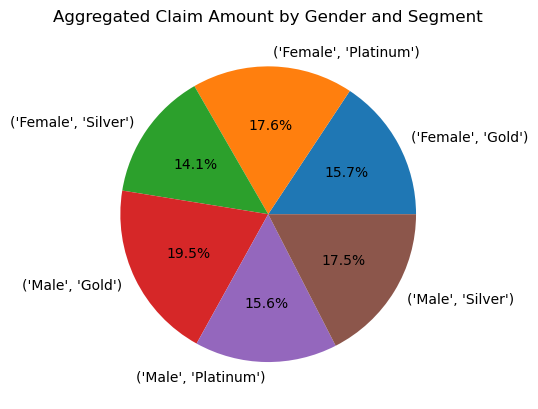

In [44]:
fig, ax = plt.subplots()
ax.pie(gender_segment['claim_amount'], labels=gender_segment.index, autopct='%1.1f%%')
ax.set_title('Aggregated Claim Amount by Gender and Segment')
plt.show()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

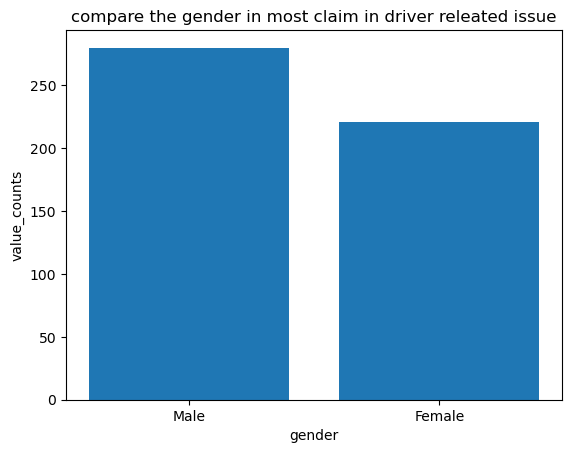

In [45]:
driver_issue = customer_claim[customer_claim['incident_cause'].str.contains("driver",case=False)]
gender_driver_issue=driver_issue['gender'].value_counts()
plt.bar(gender_driver_issue.index,gender_driver_issue.values)
plt.xlabel("gender")
plt.ylabel("value_counts")
plt.title('compare the gender in most claim in driver releated issue')
plt.show()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [46]:
fraudulent_claim = customer_claim[customer_claim['fraudulent']=='Yes']

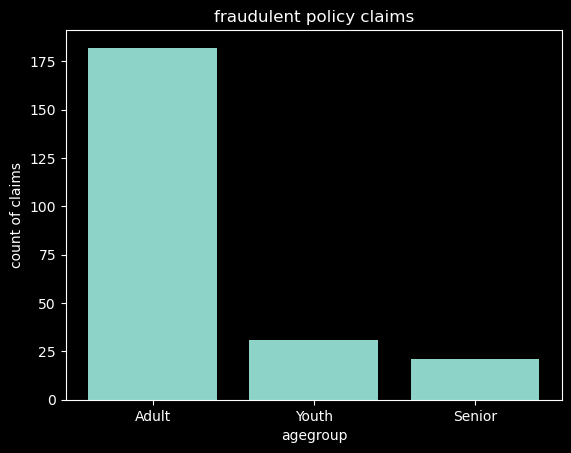

In [47]:
count_fraudulent_claim = fraudulent_claim['agegroup'].value_counts()
plt.style.use('dark_background')
plt.bar(count_fraudulent_claim.index, count_fraudulent_claim.values)
plt.title('fraudulent policy claims')
plt.xlabel('agegroup')
plt.ylabel('count of claims')
plt.show()


# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [48]:
customer_claim['month_name']=customer_claim['claim_date'].dt.strftime('%B')

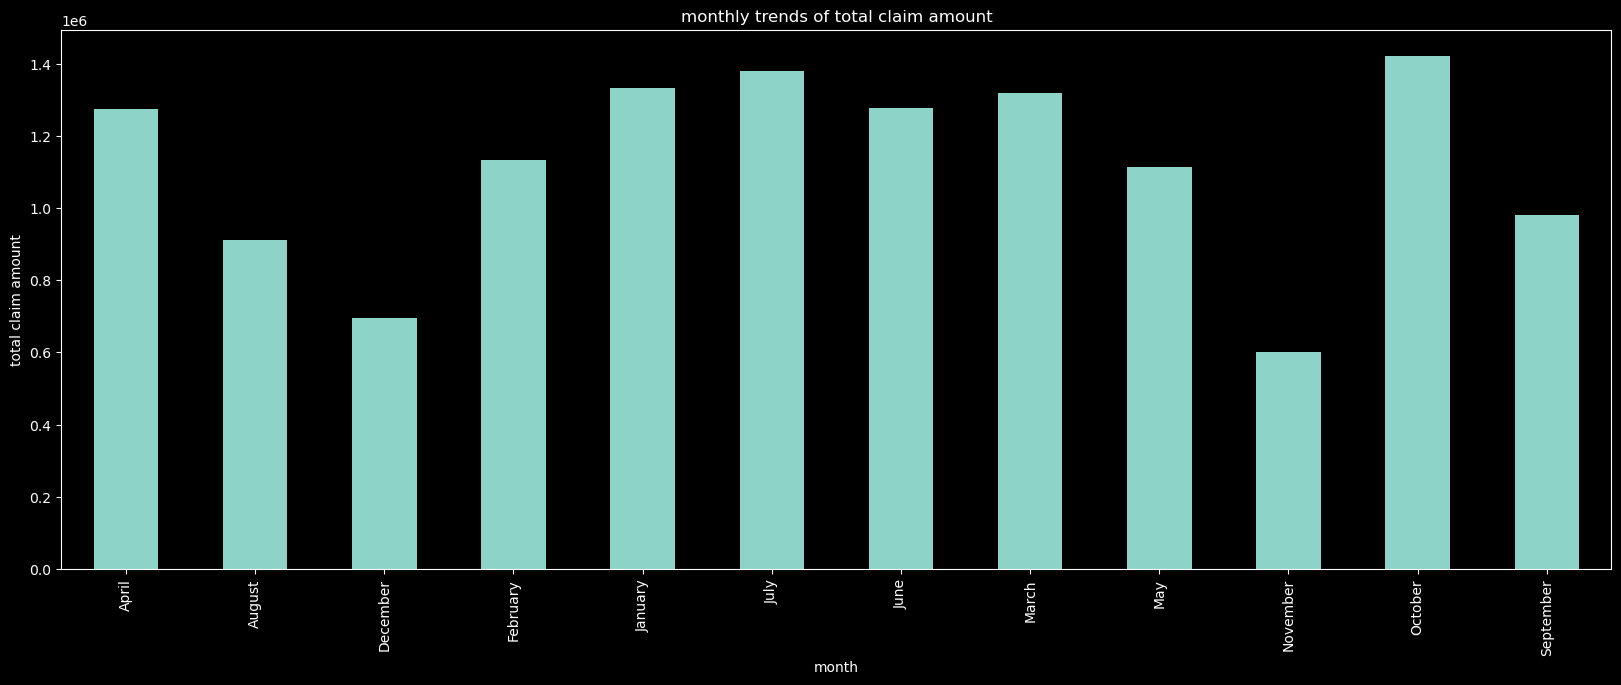

In [49]:
mothly_total_claim = customer_claim.groupby(['month_name'])['claim_amount'].sum()
mothly_total_claim.plot(kind='bar',figsize=(20,7))
plt.title('monthly trends of total claim amount')
plt.xlabel('month')
plt.ylabel('total claim amount')
plt.show()

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


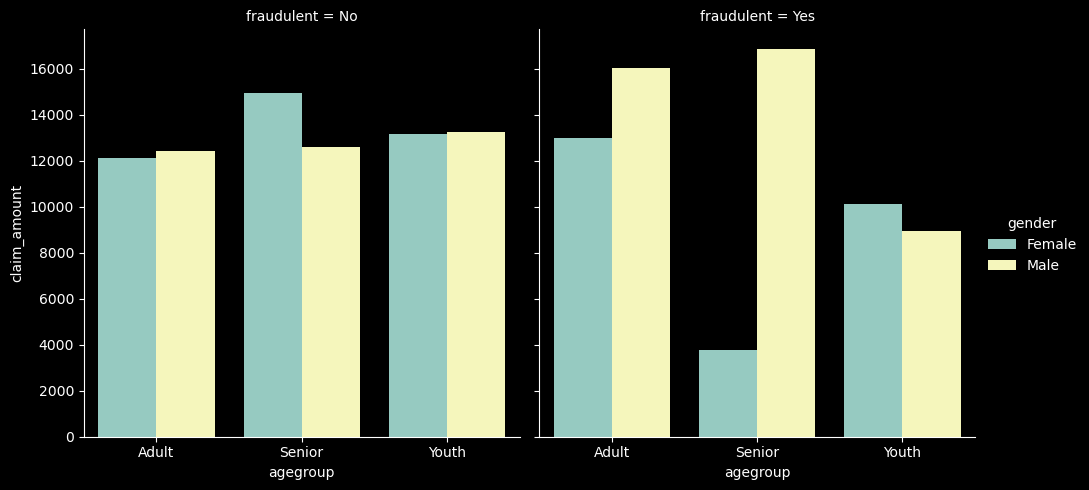

In [76]:
gender_fraudlent_claim = customer_claim.groupby(['gender','agegroup','fraudulent'])['claim_amount'].mean().reset_index()
sns.catplot(data=gender_fraudlent_claim,x='agegroup',y='claim_amount',hue='gender',col='fraudulent',kind='bar')
plt.show()

# 16. Is there any similarity in the amount claimed by males and females?

In [86]:
male=customer_claim.loc[customer_claim['gender']=='Male']
female=customer_claim.loc[customer_claim['gender']=='Female']
print("amount calim by male:",male['claim_amount'].sum())
print("amount claim by female:",female['claim_amount'].sum())

amount calim by male: 7065371.946692991
amount claim by female: 6377825.4570582425


# 17. Is there any relationship between age category and segment?


In [87]:
import scipy.stats as stats

In [92]:
agecat_seg = pd.crosstab(customer_claim['agegroup'], customer_claim['Segment'])
agecat_seg

Segment,Gold,Platinum,Silver
agegroup,,,
Adult,262,258,248
Senior,28,26,21
Youth,56,59,59


In [93]:
# Ho: There is no relationship between age category and segment
# Ha: There is a relationship between age category and segment
# CI: 95%, p: 0.05

In [95]:
Chi_test = stats.chi2_contingency(observed= agecat_seg)
Chi_test

Chi2ContingencyResult(statistic=1.0105826261029995, pvalue=0.9081870947749427, dof=4, expected_freq=array([[261.28613569, 259.02064897, 247.69321534],
       [ 25.51622419,  25.29498525,  24.18879056],
       [ 59.19764012,  58.68436578,  56.1179941 ]]))

In [96]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 1.0105826261029995 and the p value is 0.9081870947749427


In [ ]:
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis.
#Therefore there is no relationship between age category and segment

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


In [97]:
# sample to be considered
variable_name = 'claim_amount'

# mean values to be compared
pop_mean = 10000
sample = customer_claim.loc[:,variable_name]
mean_sample = sample.mean()

# display the means
print('population mean: ', pop_mean, '| sample mean: ', mean_sample )

population mean:  10000 | sample mean:  12470.498519249753


In [ ]:
# Defining the hypothesis
#H0: The mean claim amount in the current year is equal to $10,000.
#Ha: The mean claim amount in the current year is significantly different from $10,000
# CI: 99%, p: 0.01

In [98]:
# perform the test
stats.ttest_1samp(a = sample, popmean = pop_mean)

TtestResult(statistic=6.068796577191385, pvalue=1.7827316562159517e-09, df=1077)

In [ ]:
# Conclusion
# since the calculate p value is lesser than the defined p value, we fail to reject the alternate hypothesis

# We can conclude the mean claim amount in the current year is significantly different from $10,000

# 19. Is there any difference between age groups and insurance claims?

In [100]:
age_group_1 = customer_claim['total_policy_claims'].loc[customer_claim['agegroup']=="Youth"]
age_group_2 = customer_claim['total_policy_claims'].loc[customer_claim['agegroup']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is nan and the p value is nan
We fail to reject null hypothesis


# 20. Is there any relationship between total number of policy claims and the claimed amount?


In [102]:
customer_claim['total_policy_claims'] = pd.to_numeric(customer_claim['total_policy_claims'])

In [105]:
#Correlation
customer_claim['total_policy_claims'].corr(other= customer_claim['claim_amount'])

-0.01436903613753472

In [ ]:
## Conclusion
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.